In [89]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from ML import TwoLens1S
from ML import ThreeLens1S

## Set Up of "Standard" System

In [90]:
m1 = 0.3 #Lens Star Mass (Solar Mass)
m2 = 0.0002857 #Lens Planet Mass (Saturn Mass in Solar Mass)
m3 = 3.6942e-8 #Lens Moon (Earth-Moon Mass in Solas Mass)

D_l = 7.59 #kpc
D_s = 8.55 #kpc

s2 = 1.3 #R_E (Star-Planet Separation)
s3 = 0.01 #R_E (Planet-Moon Separation)

q2 = m2/m1
q3 = 3.6942e-8 

print(q2, q3, m3/m1)

# Event parameters
t0 = 0
tE = 20
rho = 0.001
rs = rho
u0_list = [0.1]

secnum = 45
basenum = 2
num_points = 1000

0.0009523333333333334 3.6942e-08 1.2314e-07


In [91]:
def Einstein_Radius(M_solar, D_l_kpc, D_s_kpc):
    """
    Computes the Einstein Radius in meters.

    Parameters:
    M_solar : float
        Mass of the lens in Solar masses
    D_l_kpc : float
        Distance to the lens in kpc
    D_s_kpc : float
        Distance to the source in kpc

    Returns:
    R_E : float
        Einstein radius in meters
    """
    # Constants
    c = 3e8            # speed of light in m/s
    G = 6.674e-11      # gravitational constant in N m^2 / kg^2
    M_sun = 1.989e30   # kg
    kpc_to_m = 3.086e19  # meters

    # Convert inputs
    M = M_solar * M_sun
    D_l = D_l_kpc * kpc_to_m
    D_s = D_s_kpc * kpc_to_m
    D_ls = (D_s - D_l)

    # Einstein radius
    R_E = ((4 * G * M / c**2) * (D_ls * D_l / D_s)) ** 0.5

    return R_E


In [92]:

R_E_m = Einstein_Radius(m1, D_l, D_s)
print(f"Einstein Radius: {R_E_m:.3e} m")

Einstein Radius: 2.158e+11 m


In [109]:
double_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 0)

In [110]:
double_model_tau = double_model.tau_lc
double_model_mag = double_model.systems[0]["mag"]

In [96]:
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 0, 15, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

# now you have
triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

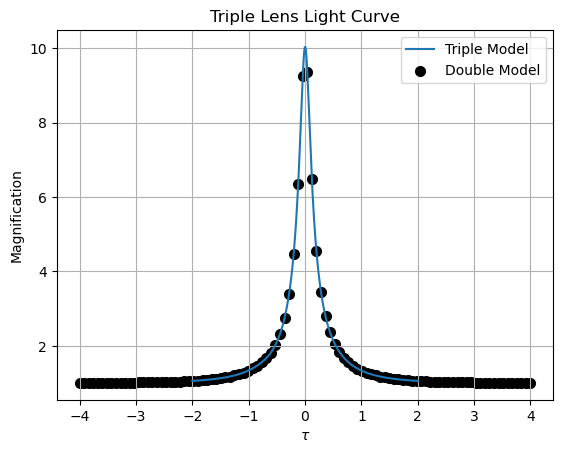

In [122]:
plt.plot(triple_model_tau, triple_model_mag, label = "Triple Model")
plt.scatter(double_model_tau, double_model_mag, color ='black', label="Double Model", lw=2)

#plt.xlim(-1, 1)
#plt.ylim(8, 11)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Triple Lens Light Curve")
plt.grid(True)
plt.legend()
plt.show()

In [103]:
two_system = double_model.systems[0]
three_system = triple_model.systems[0]

# Differences relative to source
delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

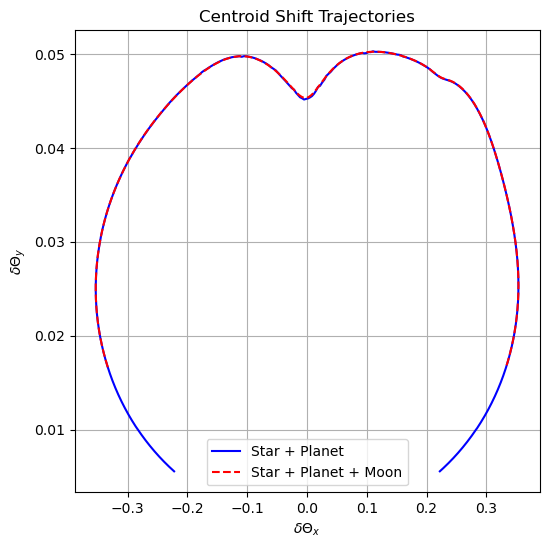

In [104]:
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Star + Planet')
plt.plot(delta_x_three, delta_y_three, 'r--', label='Star + Planet + Moon')
plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)
plt.legend()
plt.show()

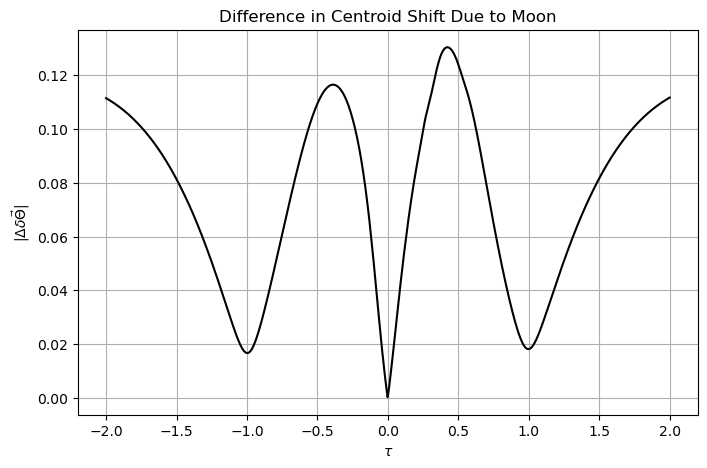

In [105]:
residual_shift = np.sqrt( (delta_x_three - delta_x_two)**2 + (delta_y_three - delta_y_two)**2 )

plt.figure(figsize=(8,5))
plt.plot(triple_model.tau, residual_shift, 'k')
plt.xlabel(r"$\tau$")
plt.ylabel(r"$|\Delta \delta \vec{\Theta}|$")
plt.title("Difference in Centroid Shift Due to Moon")
plt.grid(True)
plt.show()